In [87]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [88]:
assets_path = "..\MouseImages"
directory_files = os.listdir(assets_path)

In [108]:
def pcaFunc(kVal, iVal):    
    # Load the image 
    image = cv.imread(os.path.join(assets_path, directory_files[iVal]), cv.IMREAD_COLOR)

    # Standardize the image data
    image_standardized = (image - np.mean(image, axis=0)) / np.std(image, axis=0)

    # Reshape the standardized image into a 2D array
    height, width, channels = image.shape
    image_standardized = image_standardized.reshape(height * width, channels)

    # Compute the covariance matrix
    cov_matrix = np.cov(image_standardized, rowvar=False)

    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Select the first k eigenvectors with the largest real eigenvalues
    k = kVal
    sorted_indices = np.argsort(eigenvalues.real)[::-1]
    eigenvectors_k = eigenvectors[:, sorted_indices[:k]].real

    # Project the standardized image data onto the first k eigenvectors
    image_transformed = np.dot(image_standardized, eigenvectors_k)

    # Reconstruct the image from the transformed data
    image_reconstructed = np.dot(image_transformed, eigenvectors_k.T)

    # Reshape the reconstructed image to its original shape
    #image_reconstructed = image_reconstructed.reshape(height, width, channels)

    return image_reconstructed.reshape(image.shape), eigenvalues

In [109]:
def cevFunc(eigenvalues):
    # Calculate the explained variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance)

    return cumulative_explained_variance 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


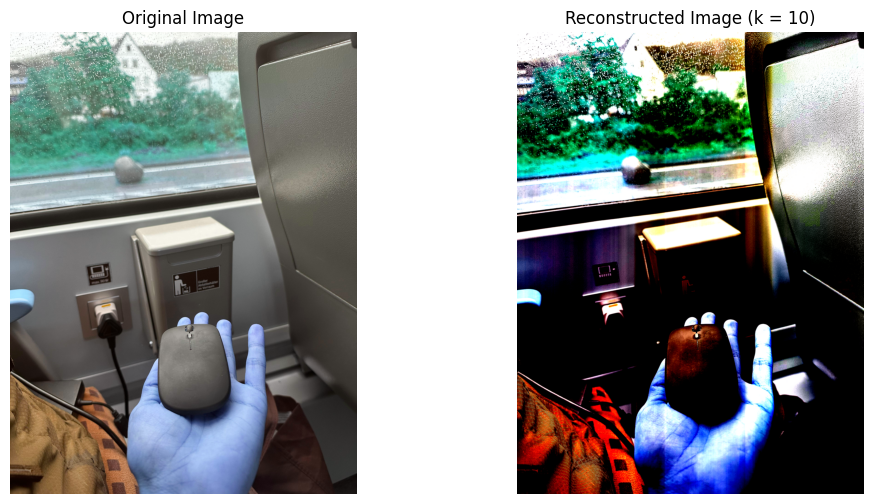

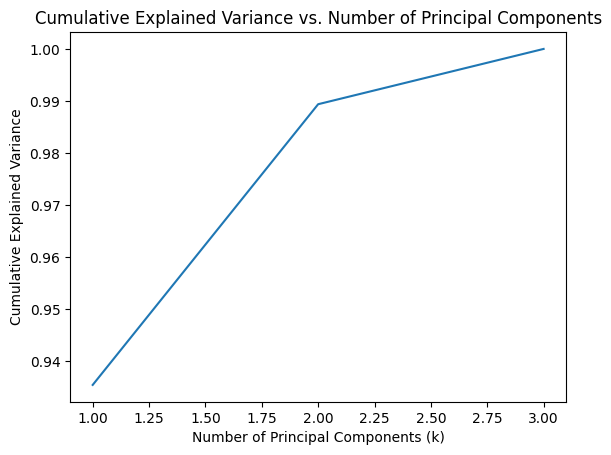

In [110]:
kVal = 10
iVal = 14

orgImage = cv.imread(os.path.join(assets_path, directory_files[iVal]))
image_reconstructed, eigenvalues = pcaFunc(kVal, iVal)

cumulative_explained_variance = cevFunc(eigenvalues)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orgImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image (k = {})'.format(kVal))
plt.axis('off')
plt.show()

# Plot the cumulative explained variance
plt.figure()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


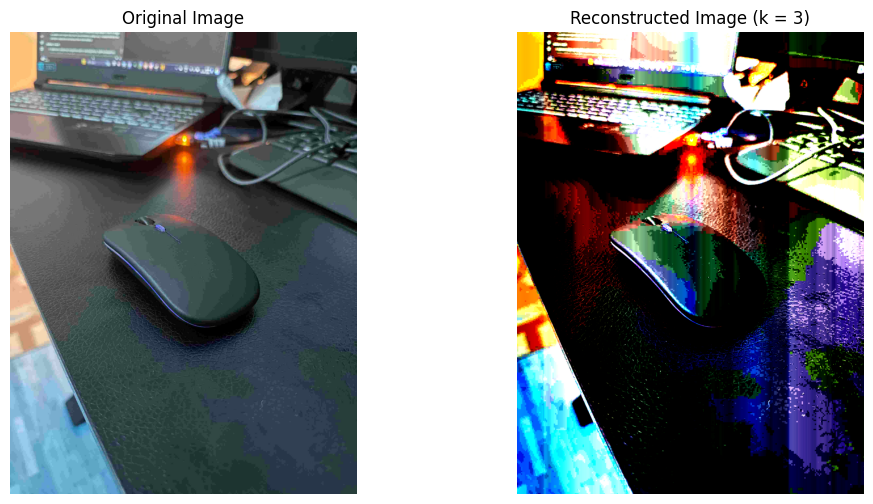

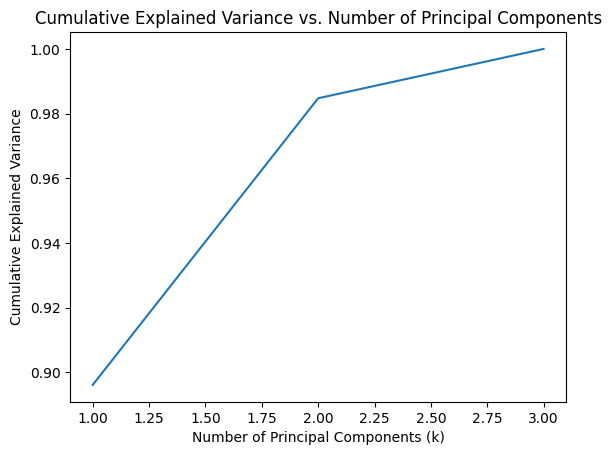

In [104]:
kVal = 3
iVal = 1

orgImage = cv.imread(os.path.join(assets_path, directory_files[iVal]))
image_reconstructed, eigenvalues = pcaFunc(kVal, iVal)

cumulative_explained_variance = cevFunc(eigenvalues)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orgImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image (k = {})'.format(kVal))
plt.axis('off')
plt.show()

# Plot the cumulative explained variance
plt.figure()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


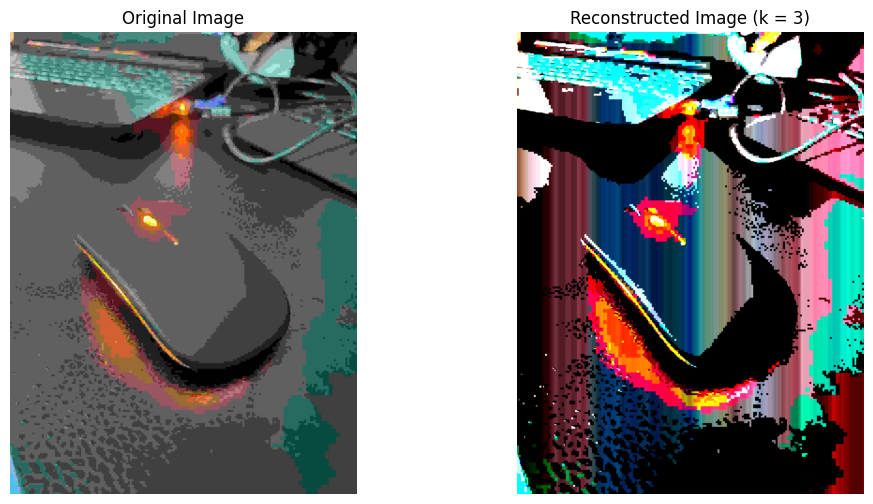

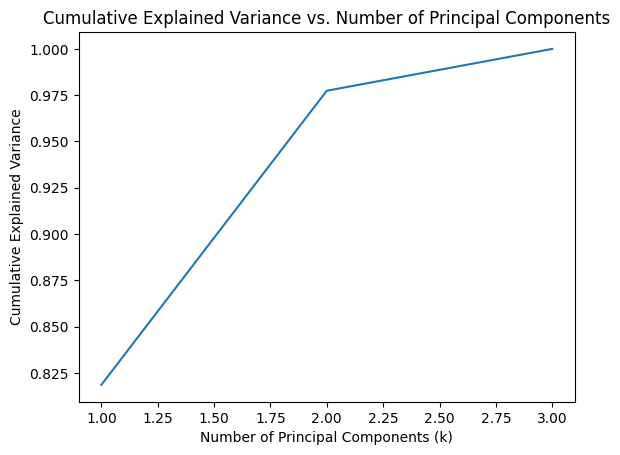

In [111]:
kVal = 3
iVal = 11

orgImage = cv.imread(os.path.join(assets_path, directory_files[iVal]))
image_reconstructed, eigenvalues = pcaFunc(kVal, iVal)

cumulative_explained_variance = cevFunc(eigenvalues)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(orgImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image (k = {})'.format(kVal))
plt.axis('off')
plt.show()

# Plot the cumulative explained variance
plt.figure()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()